# Examen Parcial: Métodos de Predicción en la Economía

### Importación de librerías

In [591]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm, t, tstd
from math import sqrt

### Definición de variables para $\beta_1$ y $\beta_2$

In [592]:
n = 25
b1 = 20
b2 = 0.6

### Función para calcular valores de $Y_i$ 

In [593]:
def Yi():
    global b1, b2, n, Xi
    Y = []
    # Generar 25 valores aleatorios para la distribución normal N(0, 16)
    mu, sigma = 0, 4 # mu=0 y sigma=4 por que la varianza es 16
    ui = tuple(np.random.normal(mu, sigma, n))
    for i in range(n):
        yi = b1 + b2 * Xi[i] + ui[i]
        Y.append(yi)
    return(Y)

### Generar valores de $X$ aleatorios

In [594]:
Xi = []
for i in range(n):
    Xi.append(random.uniform(50, 300))
print("VALORES DE X \n")
for x in Xi:
    print(x)

VALORES DE X 

173.43545288445938
102.38167137643723
295.04826124870465
154.07765586321193
250.22795935068802
204.9791535560054
73.49734216179027
163.04191175022152
267.7807269750126
290.11643861588107
117.42568688485068
214.85979993941754
222.49866658043982
243.5717434560906
245.54769040338155
68.73632168741358
292.00262880592516
99.35483316306127
214.38750750060686
202.41292724601524
100.29765843806231
82.02870296916888
233.40993900996523
141.5653203396376
124.34772085354544


### Regresión lineal para las $Y_i$'s obtenidas y los $X$ generados

In [595]:
from scipy.stats import linregress
B1 = []
B2 = []
S = []
X = np.array(Xi)
for i in range(500):
    y = np.array(Yi())

    slope, intercept, r_value, p_value, std_err = linregress(X, y)

    SSE = (r_value ** 2) * np.sum((y - (slope * X + intercept)) ** 2)
    sigma_est = SSE / (n - 2)

    S.append(sigma_est)
    B1.append(intercept)
    B2.append(slope)

### Creación de histogramas de frecuencias

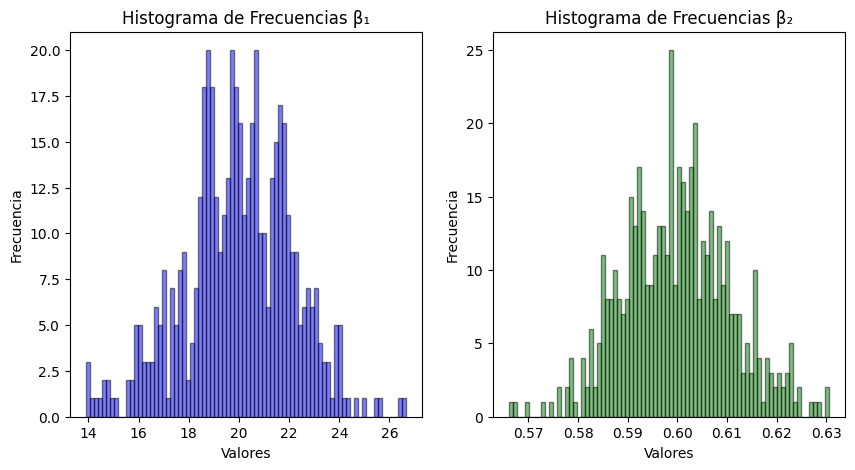

In [596]:
# Crear dos subplots y hacer un histograma de frecuencias para cada conjunto de datos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(B1, bins=80, color='blue', alpha=0.5, edgecolor='black')
axs[1].hist(B2, bins=80, color='green', alpha=0.5, edgecolor='black')
# Establecer el título y las etiquetas de los ejes
axs[0].set_title('Histograma de Frecuencias β₁')
axs[1].set_title('Histograma de Frecuencias β₂')
axs[0].set_xlabel('Valores')
axs[1].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Frecuencia')
# Mostrar la figura
plt.show()


### Describir si hay algún nivel de asimetría

En la representación gráfica de los datos mediante el histograma, es común observar que los datos se agrupan alrededor de la media, lo que sugiere que la mayoría de los datos tienen valores cercanos a la media. Además, se puede notar que la frecuencia de los valores máximos y mínimos es baja, lo que indica que estos valores son menos comunes en comparación con los valores cercanos a la media.

Cabe destacar que, al repetir el procedimiento de generación de histogramas de frecuencias para los coeficientes $\beta_1$ y $\beta_2$ en distintas ocasiones, se puede observar que el coeficiente de asimetría de Pearson no siempre mantiene su signo. Esto significa que el histograma de frecuencias no siempre está sesgado hacia el mismo lado, lo que puede afectar la interpretación de los datos. Por lo tanto, es importante ser cuidadosos en el análisis de los resultados y considerar la posibilidad de que el sesgo del histograma pueda cambiar en diferentes muestras de datos.

### Obtener los *números índice*

In [597]:
# Obtener la media
mediaB1 = np.mean(B1)
mediaB2 = np.mean(B2)

# Obtener el minimo
minB1 = min(B1)
minB2 = min(B2)

# Obtener maximo
maxB1 = max(B1)
maxB2 = max(B2)

# Obtener mediana
medianaB1 = np.median(B1)
medianaB2 = np.median(B2)

# Obtener 1 y 3 cuartil
q1B1 = np.percentile(B1,25)
q1B2 = np.percentile(B2,25)
q3B1 = np.percentile(B1,75)
q3B2 = np.percentile(B2,75)

#### ¿Se cumple $E(\hat{\beta}_i) = \beta_i$?

In [598]:
mediaB1

19.96600690205136

In [599]:
mediaB2

0.5997669711308756

No se cumple la igualdad de forma exacta, pero los valores son muy cercanos. Esto nos lleva a pensar que $\hat{\beta}_1$ y $\hat{\beta}_2$ son buenos estimadores de $\beta_1$ y $\beta_2$. Están muy cercanos a ser estimadores insesgados, de acuerdo al resultado arrojado con la muestra tomada. De hecho, si aproximamos a dos cifras significativas a $E(\hat{\beta_i})$, tenemos $E(\hat{\beta_i})=\beta_i$.

### Construcción de intervalos de confianza

Dado que tenemos más de 30 valores de $\hat{\beta_2}$ y podemos conocer la varianza muestral, construiremos el intervalo de confianza usando la distribución t-Student con 498 grados de libertad y un nivel de significancia de 0.05. Dado que la muestra es grande, se puede utilizar la distribución normal. 

In [600]:
#Construcción del intervalo de confianza
intervalo = t.interval(0.9, len(B2) - 2, loc = mediaB2, scale = tstd(B2))
intervalo


(0.5818168102409016, 0.6177171320208495)

### Determinar la proporción de intervalos que contienen el parámetro $\beta_2$

In [601]:
contador = 0
for valor in B2:
    if intervalo[0] < valor < intervalo[1]:
        contador += 1
proporcion = contador / len(B2)
proporcion

0.902

La proporcion de los datos que estan dentro del intervalo de confianza esta bastante cerca al nivel de confianza. Esto indica que el intervalo de confianza es apropiado para los datos y que la estimación del coeficiente de la regresión es precisa.

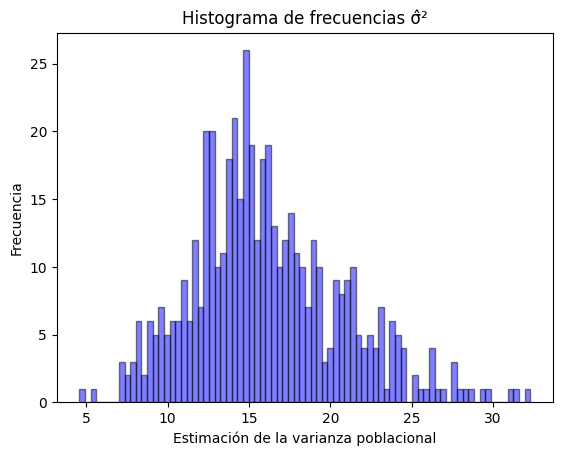

In [603]:
# Crear dos subplots y hacer un histograma de frecuencias para cada conjunto de datos

plt.hist(S, bins=80, color='blue', alpha=0.5, edgecolor='black')

plt.xlabel("Estimación de la varianza poblacional")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencias \u03C3\u0302²")
# Mostrar la figura
plt.show()
